# Initiation

# Setting up the dataset

In [2]:
df = pd.read_csv("./data/RemandCnt.csv", parse_dates=['date'])
yrs = 5
centers = ['Regina', 'Saskatoon', 'PrinceAlbert', 'PineGrove']


# Unweighted Plots

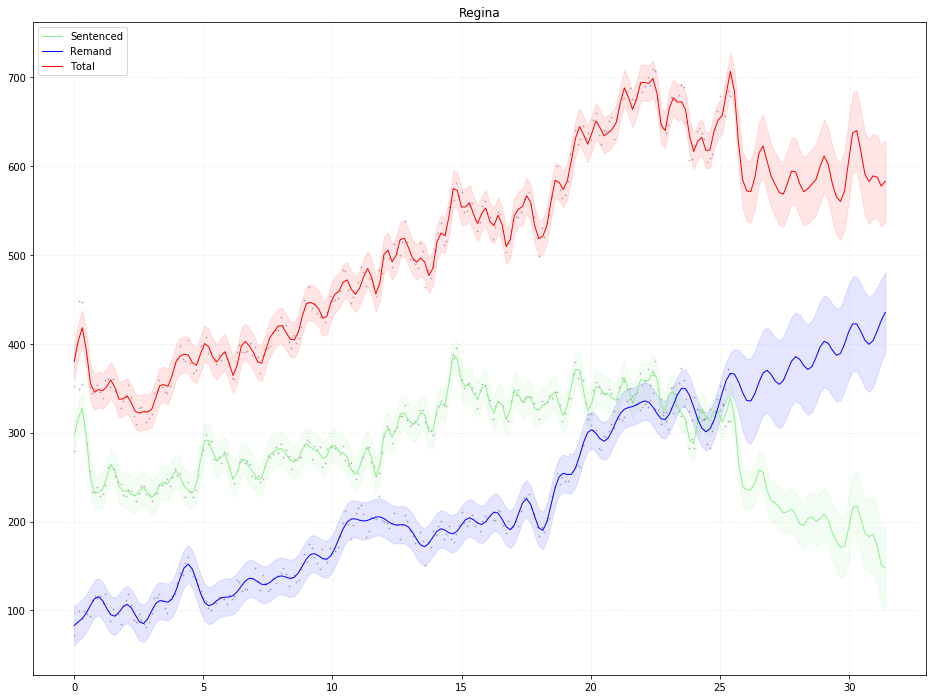

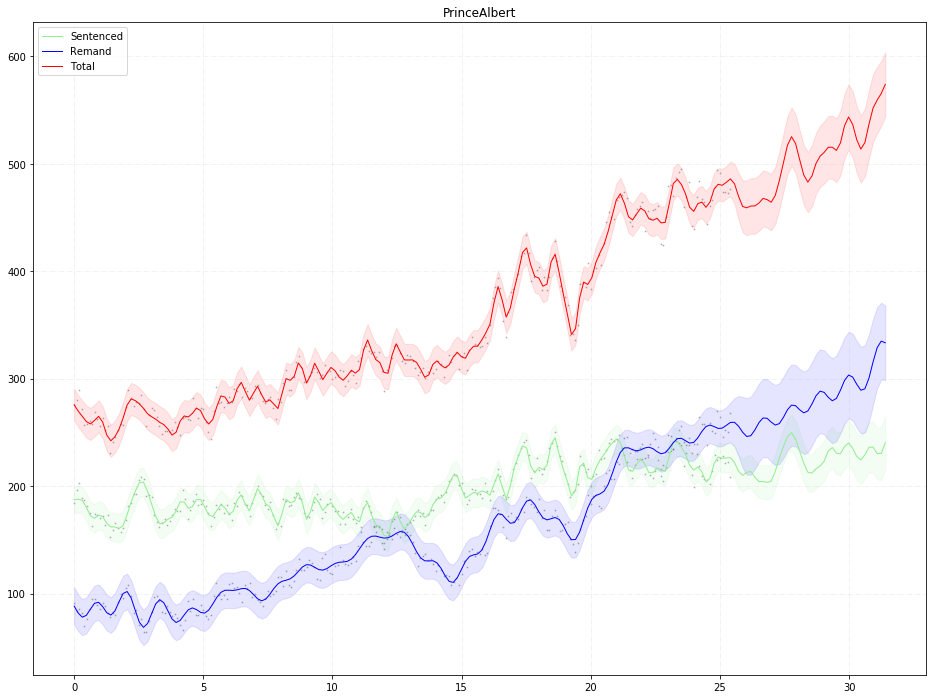

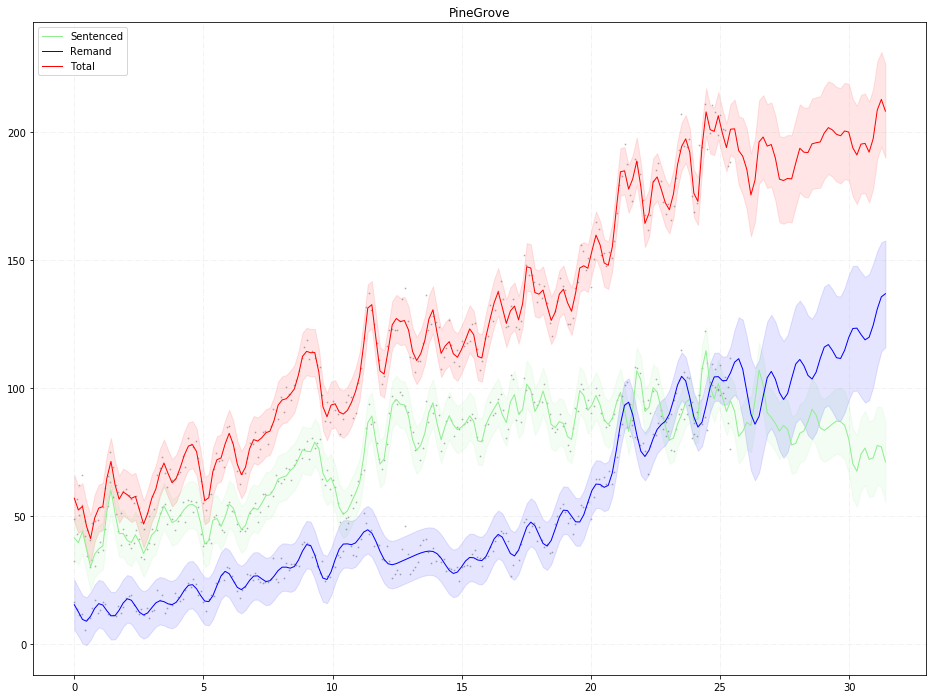

In [3]:
for cntr in centers:
    plot_population(df, center=cntr, start=0., yrs=yrs, method='monthly')


# Weighted Plots

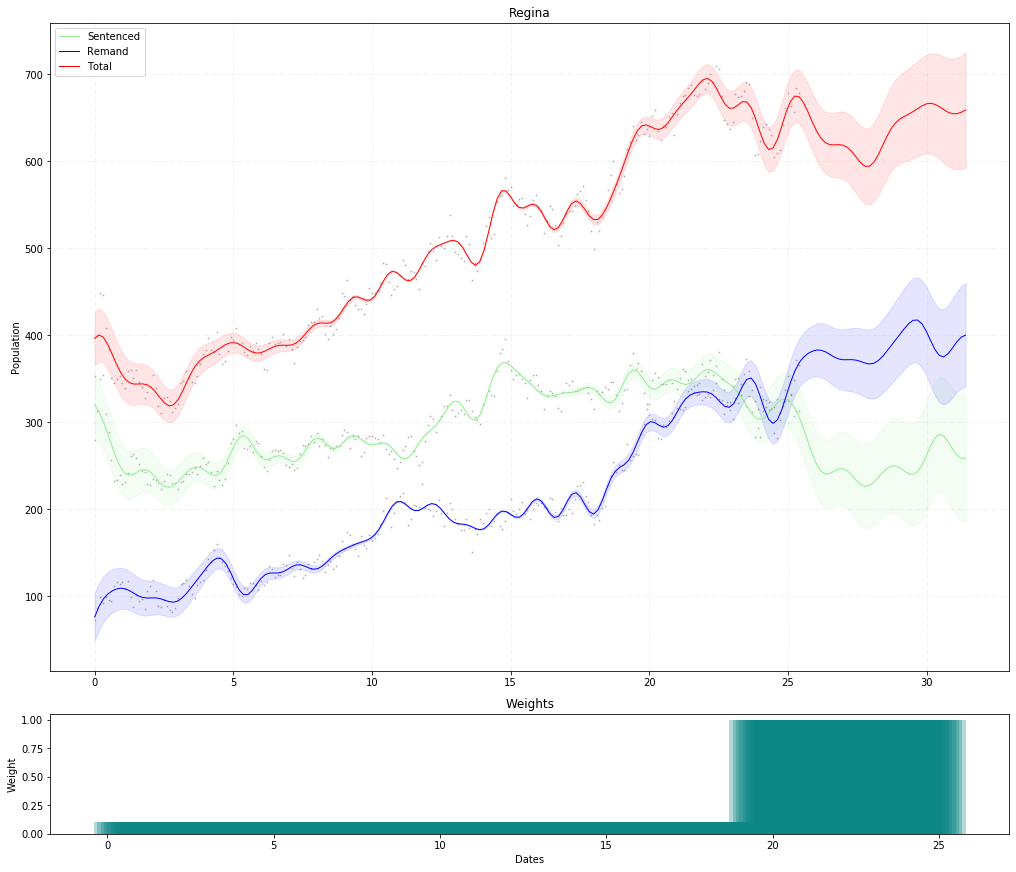

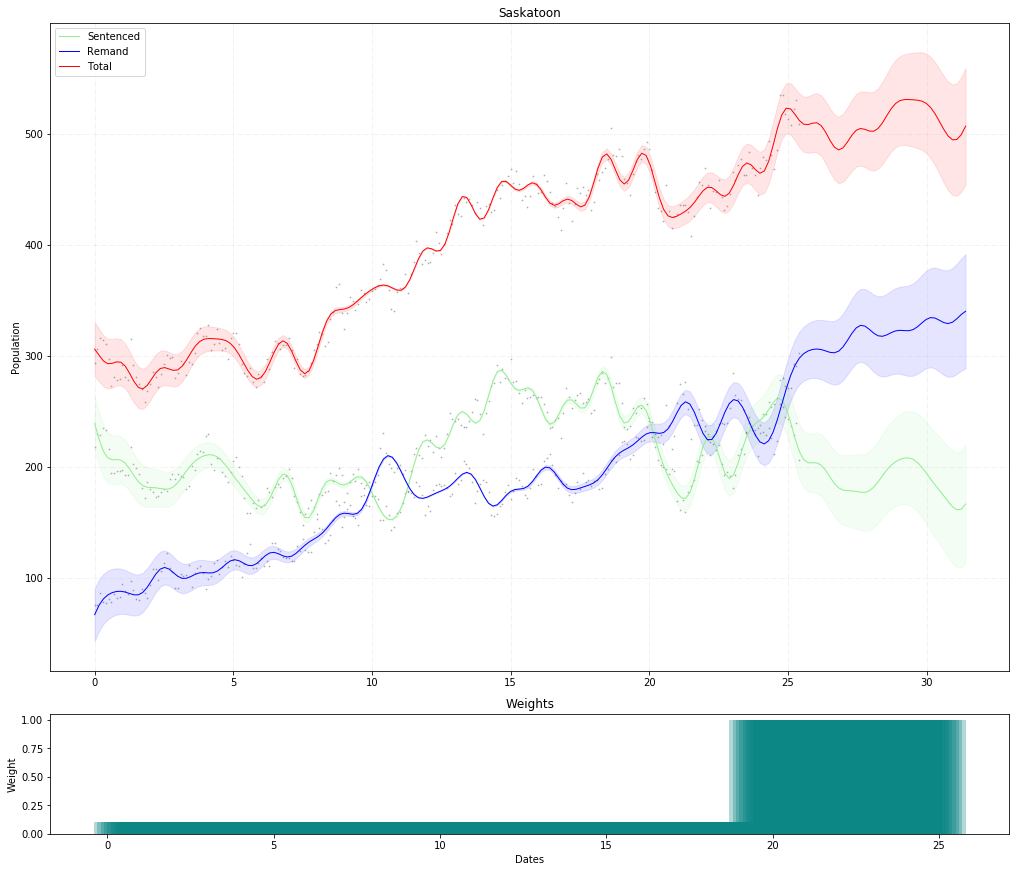

In [4]:
for cntr in centers:
    plot_population_hilbert(df, center=cntr, start=0., yrs=yrs, method='monthly')


# Facebook-Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.
/home/mehdi/.local/lib/python3.6/site-packages/pandas/core/frame.py:4238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality

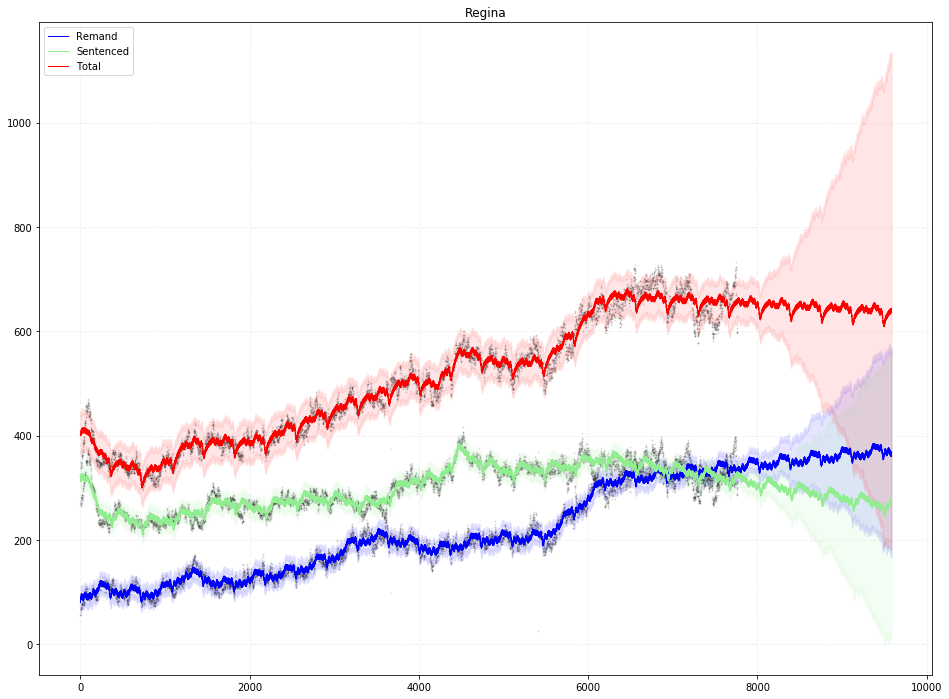

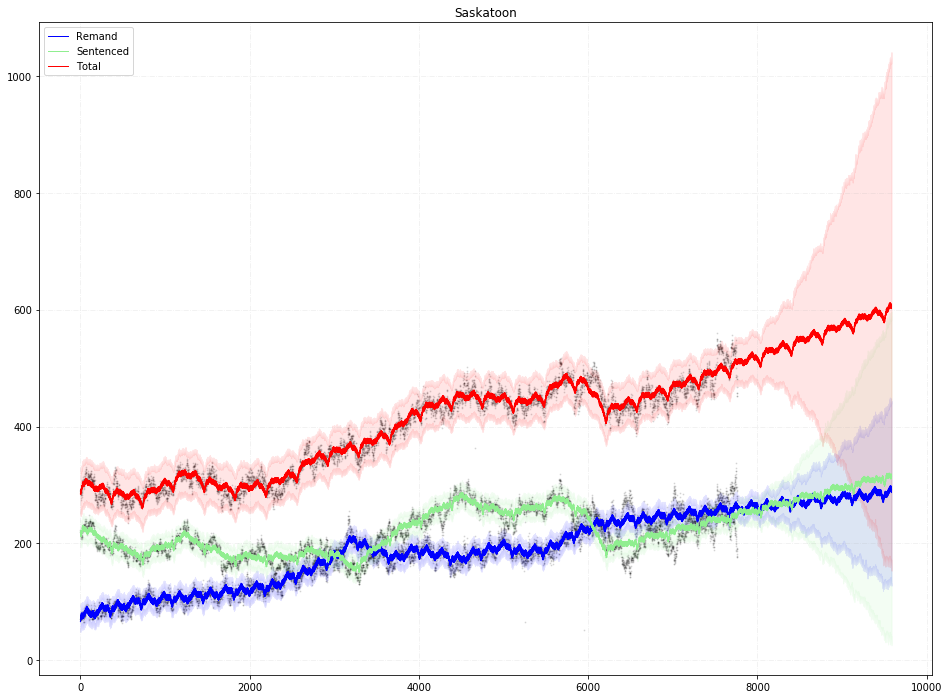

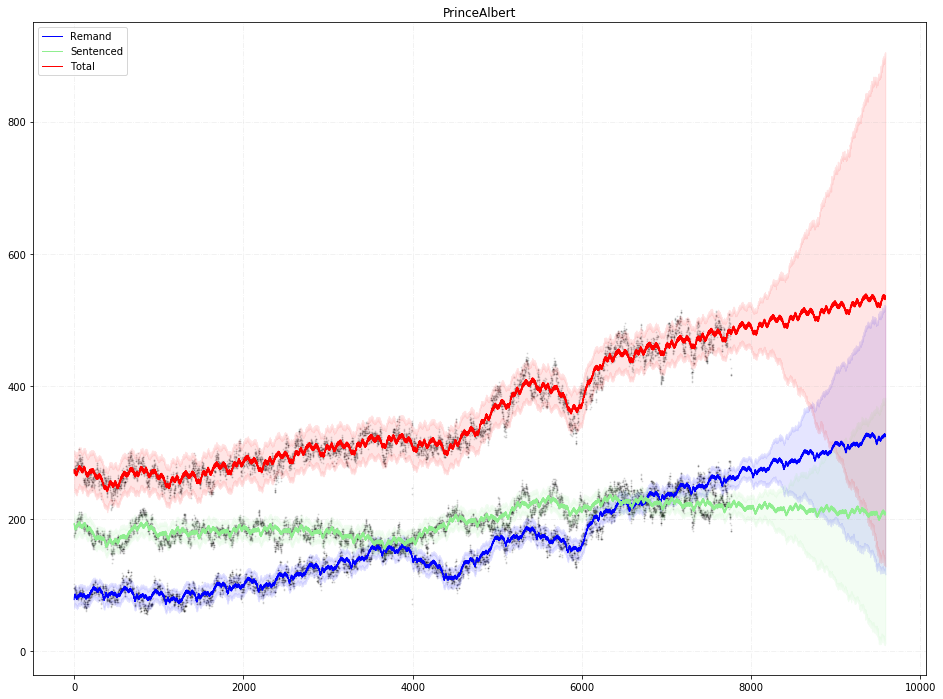

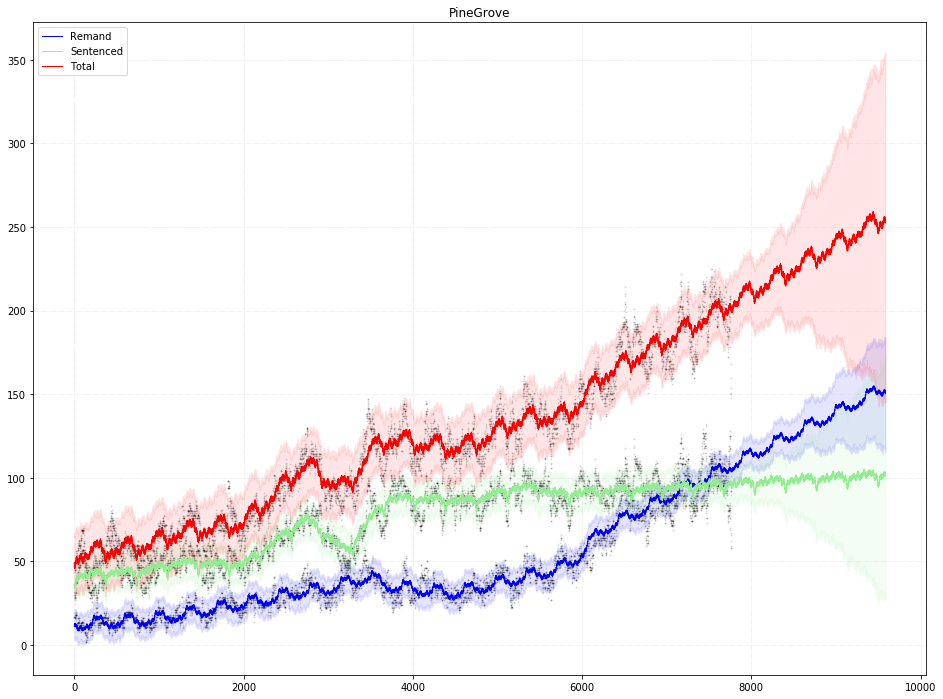

In [5]:
for cntr in centers:
    prophet(df, center=cntr, yrs=yrs)

# Growth rates

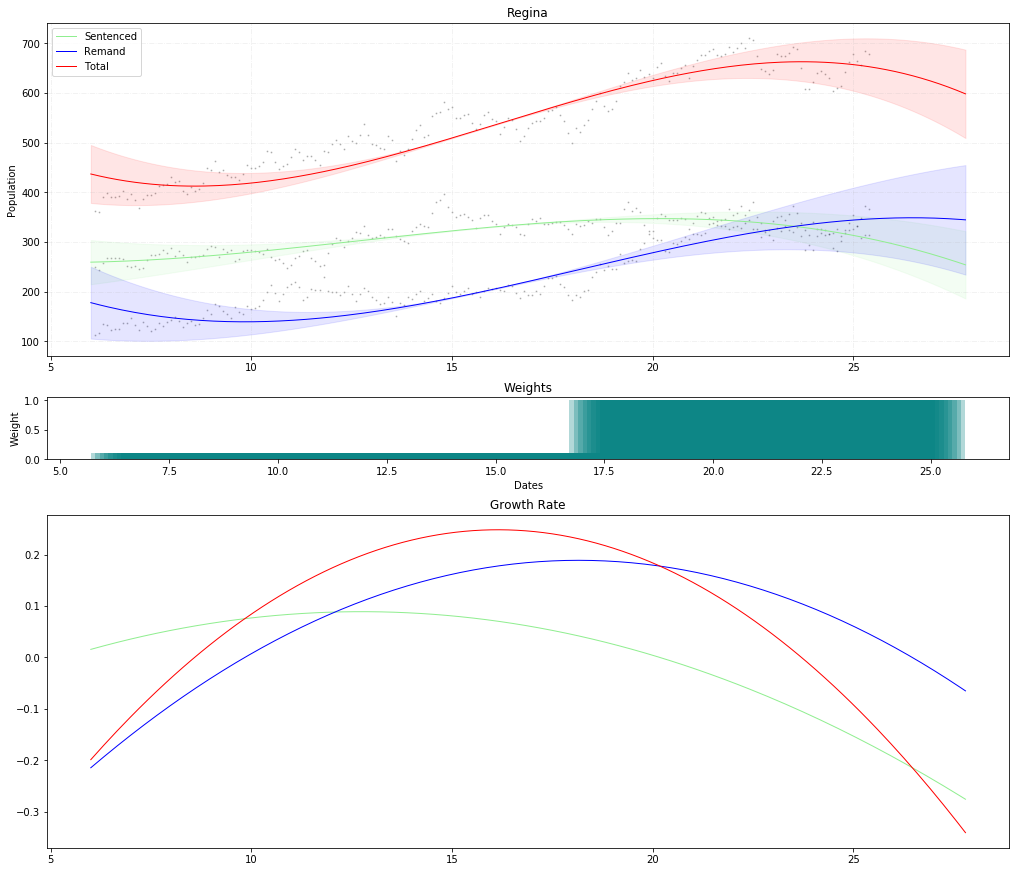

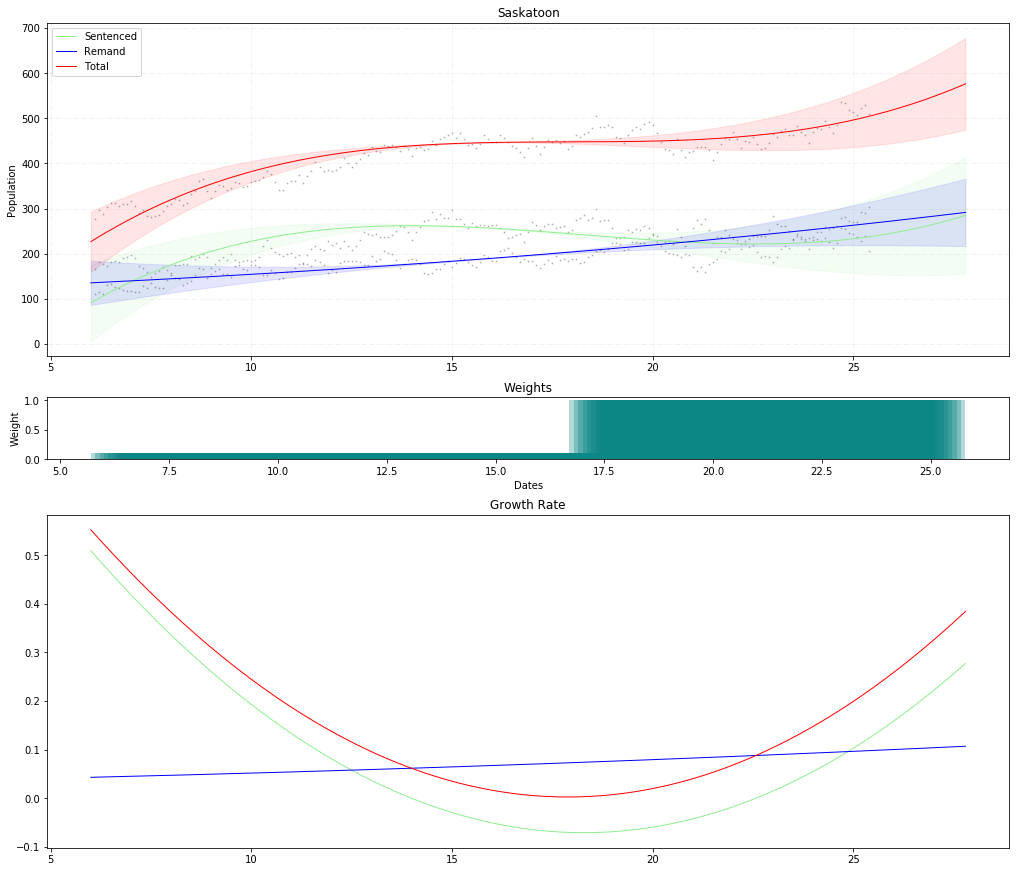

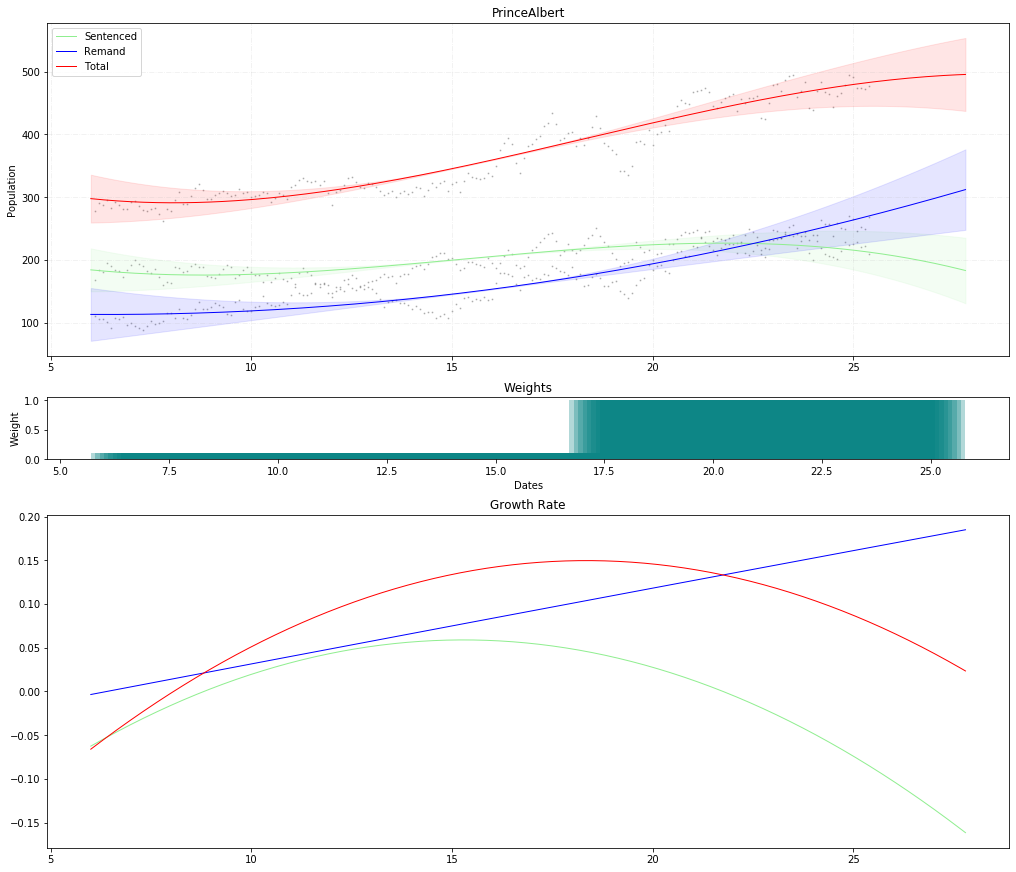

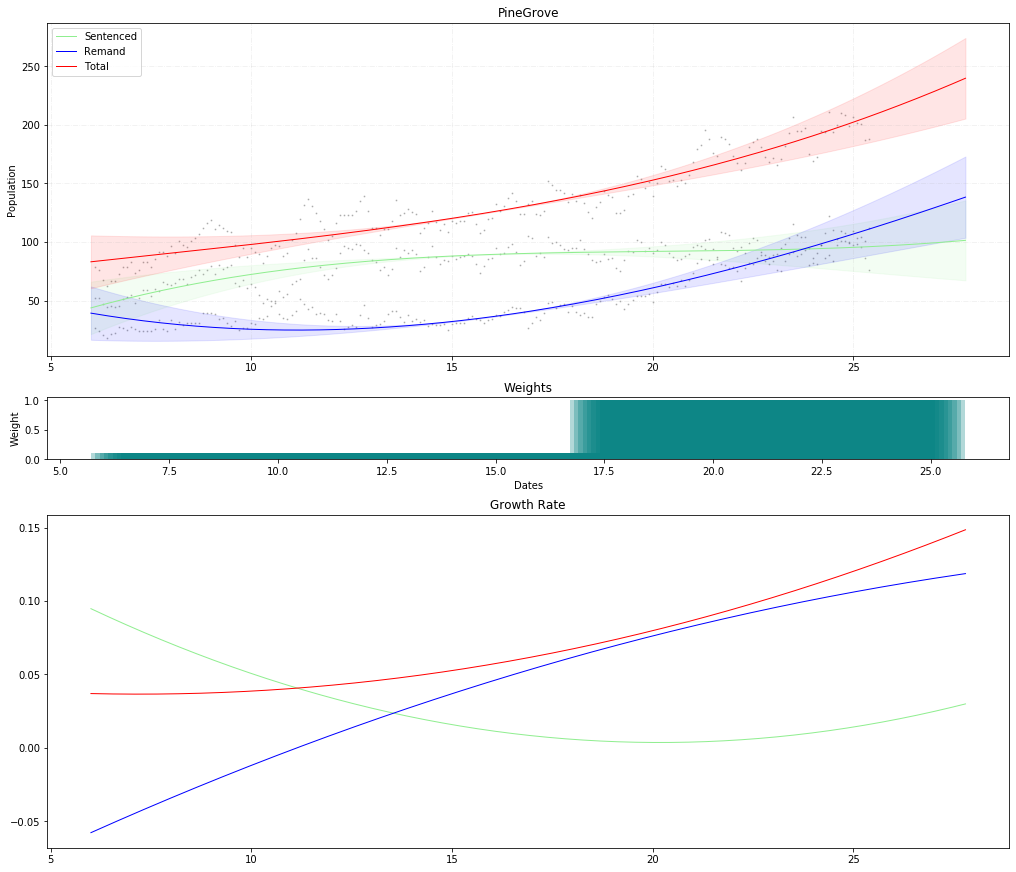

In [3]:
for cntr in centers:
    plot_population_baseline(df, center=cntr, start=6., yrs=2, method='monthly')


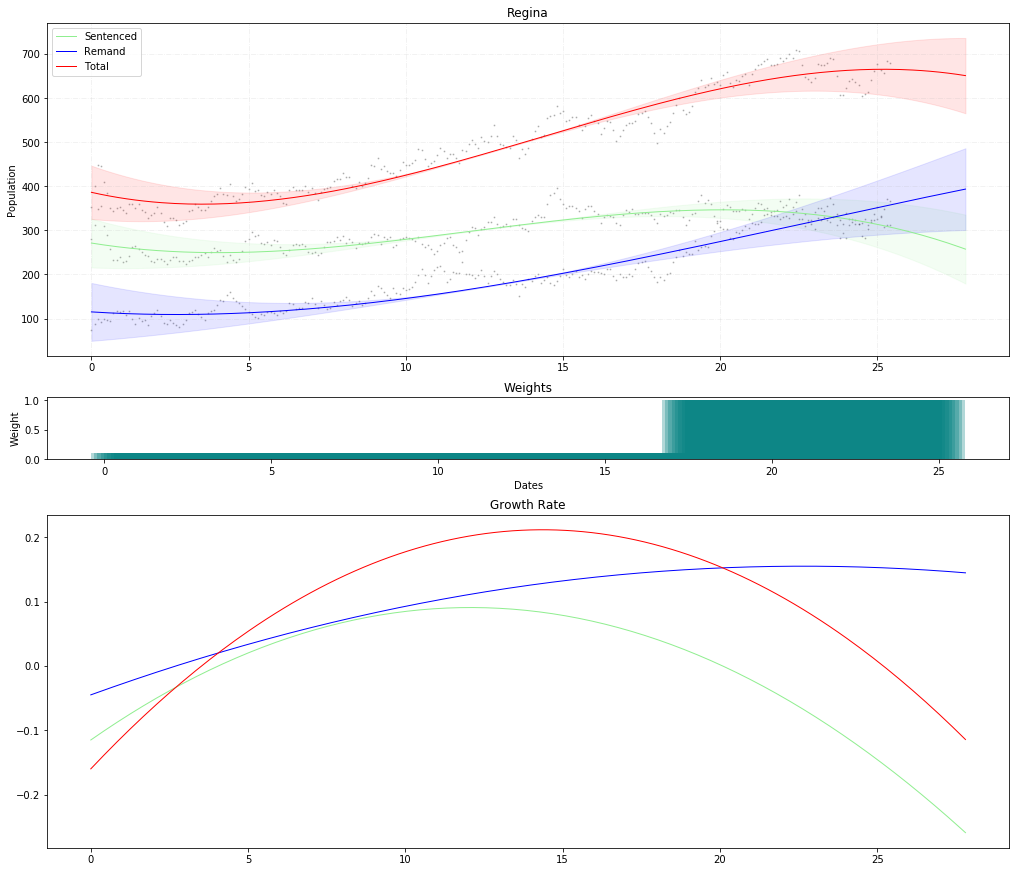

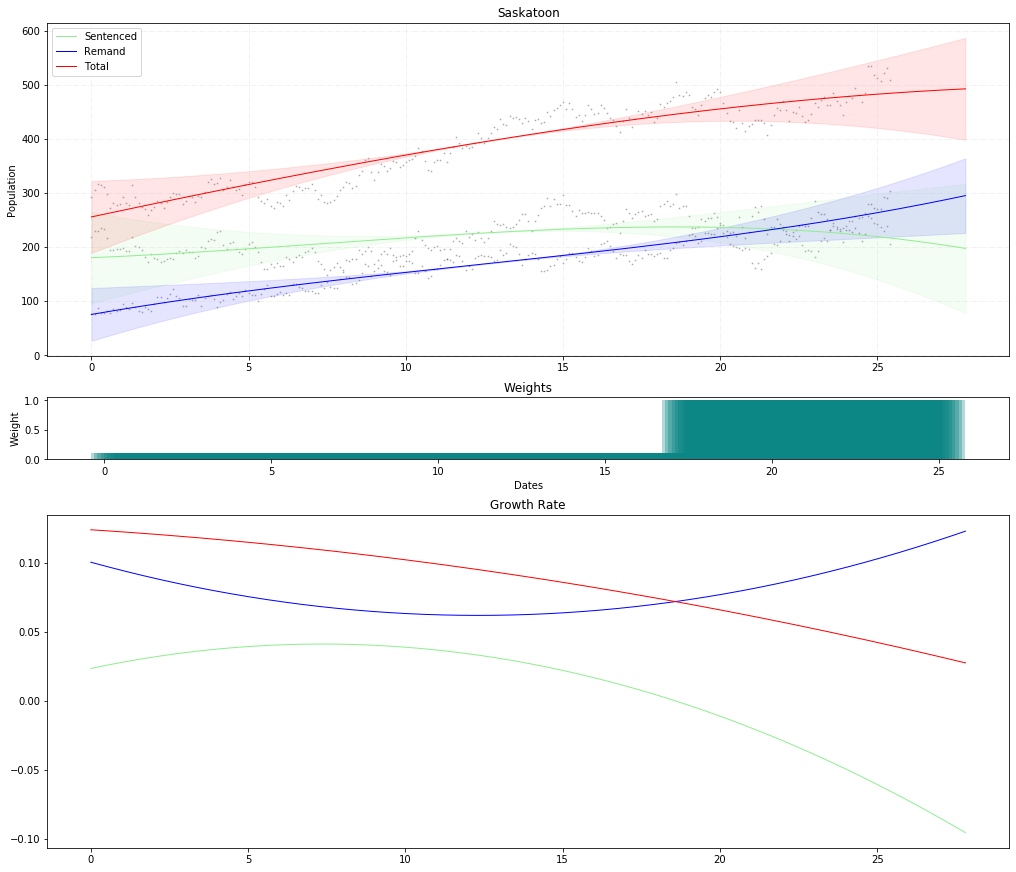

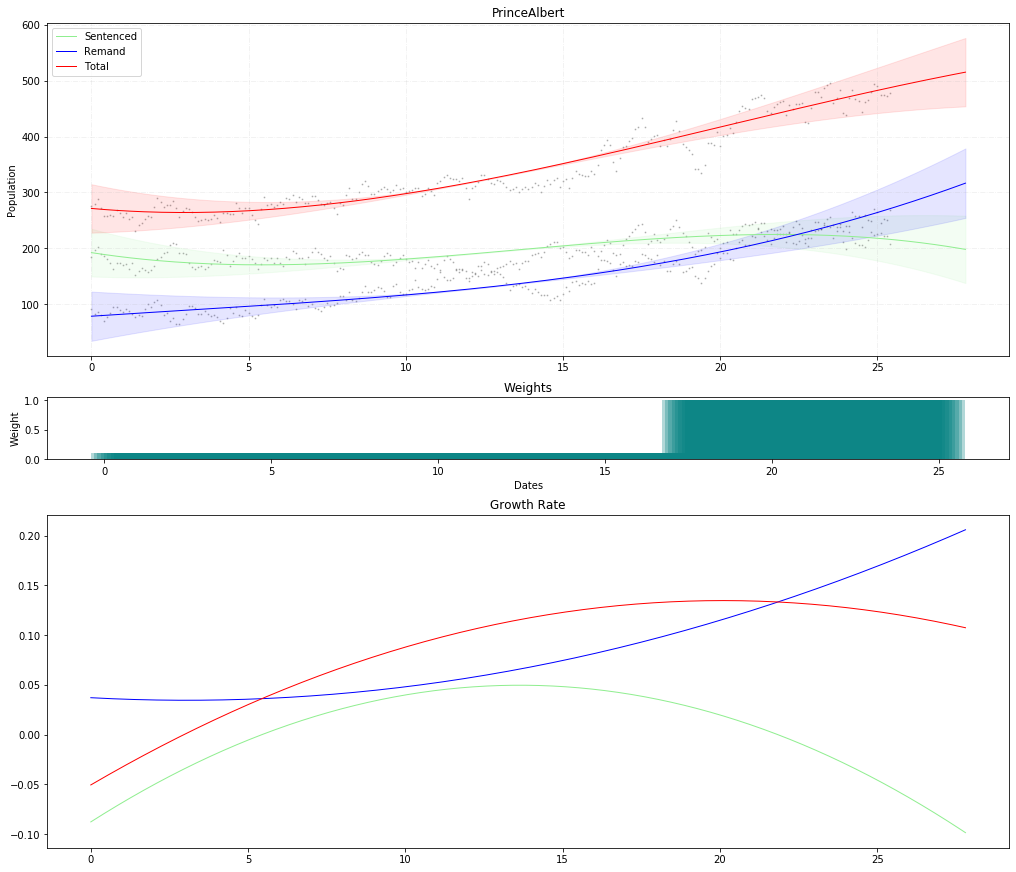

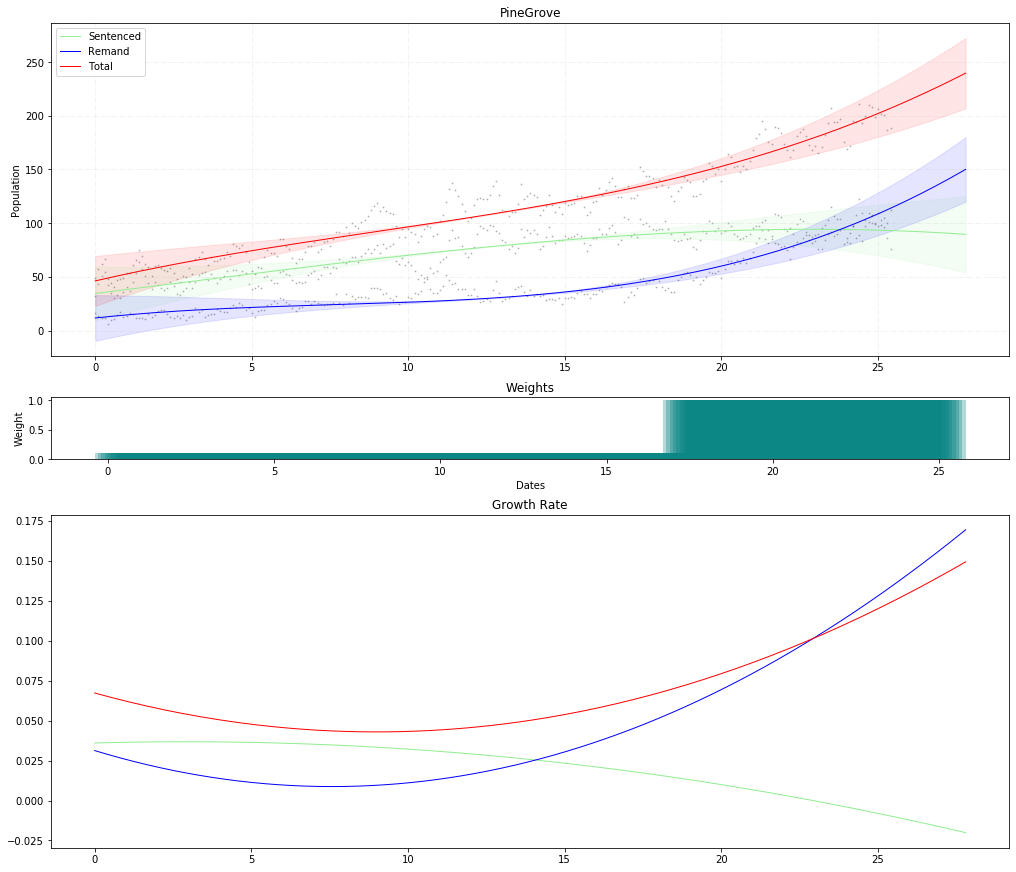

In [28]:
for cntr in centers:
    plot_population_baseline(df, center=cntr, start=0., yrs=2, method='monthly')


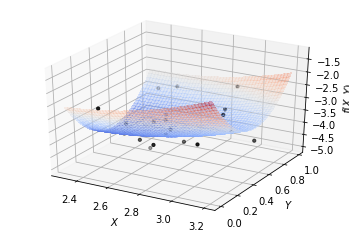

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.pyplot as plt
import numpy as np
from GeneralRegression.NpyProximation import HilbertRegressor, Measure
from GeneralRegression.extras import FunctionBasis
def randrange(n, vmin, vmax):
    '''
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    '''
    return (vmax - vmin)*np.random.rand(n) + vmin

# degree of polynomials
deg = 2
FB = FunctionBasis()
B = FB.poly(2, deg)
# initiate regressor
regressor = HilbertRegressor(base=B)
# number of random points
n = 20
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c, m, zlow, zhigh in [('k', 'o', -5, -2.5)]:
    xs = randrange(n, 2.3, 3.2)
    ys = randrange(n, 0, 1.0)
    zs = randrange(n, zlow, zhigh)
    ax.scatter(xs, ys, zs, c=c, s=10, marker=m)
ax.set_xlabel('$X$')
ax.set_ylabel('$Y$')
ax.set_zlabel('$f(X,Y)$')
X = np.array([np.array((xs[_], ys[_])) for _ in range(n)])
y = np.array([np.array((zs[_],)) for _ in range(n)])
X_ = np.arange(2.3, 3.2, 0.02)
Y_ = np.arange(0, 1.0, 0.02)
_X, _Y = np.meshgrid(X_, Y_)
# fit the regressor
regressor.fit(X, y)
# prepare the plot
Z = []
for idx in range(_X.shape[0]):
    _X_ = _X[idx]
    _Y_ = _Y[idx]
    _Z_ = []
    for jdx in range(_X.shape[1]):
        t = np.array([np.array([_X_[jdx], _Y_[jdx]])])
        _Z_.append(regressor.predict(t)[0])
    Z.append(np.array(_Z_))
Z = np.array(Z)
surf = ax.plot_surface(_X, _Y, Z, cmap=cm.coolwarm, linewidth=0, antialiased=False, alpha=.3)


In [3]:
regressor.score(X, y)

0.20538490757863787